# Install & Load Package

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

In [2]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# Load Dataset

In [3]:
# load customer churn dataset
data = pd.read_csv('/content/bank_churn_data.csv')

In [4]:
# check the first 5 data frim churn_data
data.head()

user_id     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

Anda diberikan data dengan beberapa variabel yang diberikan sebagai berikut:
1. user_id: customer account number.
2. attrition_flag: customer status (Existing and Attrited).
3. customer_age: age of the customer.
4. gender: gender of customer (M for male and F for female).
5. dependent_count: number of dependents of customers.
6. education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
7. income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).
8. card_category: type of card used (Blue, Silver, Gold, and Platinum).
9. months_on_book: period of being a customer (in months).
10. total_relationship_count: the number of products used by customers in the bank.
11. months_inactive_12_mon: period of inactivity for the last 12 months.
12. contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
13. credit_limit: credit card transaction nominal limit in one period.
14. total_revolving_bal: total funds used in one period.
15. avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
16. total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
17. total_trans_amt: total nominal transaction in the last 12 months.
18. total_trans_ct: the number of transactions in the last 12 months.
19. total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
20. avg_utilization_ratio: percentage of credit card usage.


# Data Inspection

In [5]:
# check churn_data data structure and its types
data.dtypes

user_id                       int64
attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [6]:
# check data dimension
data.shape

(10127, 21)

In [7]:
data.replace('?', np.nan, inplace=True)

In [8]:
# check null values inside dataset
data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [9]:
# removes row with na values
data = data.dropna()

In [10]:
# check dimension and null values inside dataset
print("Dimension of data: {}".format(data.shape))
print("Number of null values:")
data.isna().sum()

Dimension of data: (10127, 21)
Number of null values:


user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [11]:
# drop custid column
data = data.drop(['user_id'], axis = 1)

In [12]:
data.duplicated().sum()

0

# Simple EDA

1. Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: customer_age, dtype: float64


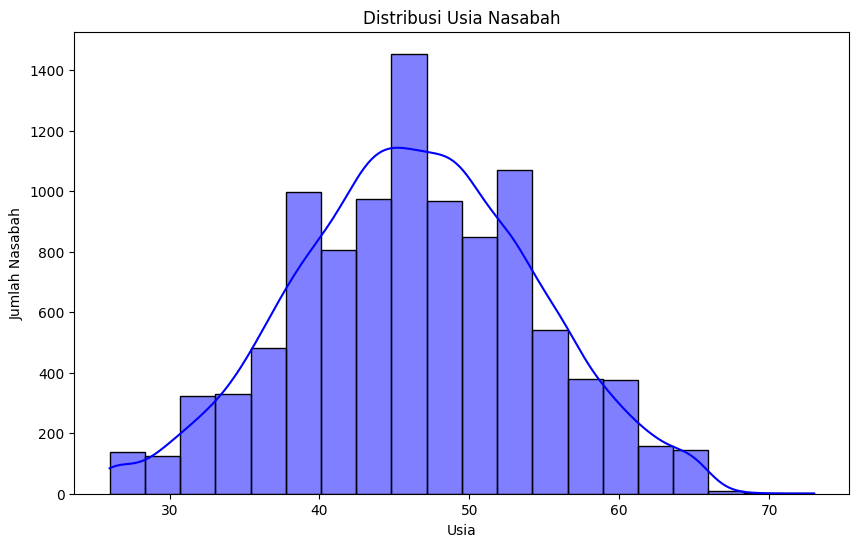

In [13]:
# Statistik deskriptif untuk kolom 'customer_age'
print(data['customer_age'].describe())

# Visualisasi distribusi usia
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['customer_age'], kde=True, bins=20, color='blue')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.show()


Grafik distribusi usia menunjukkan pola hampir normal (bell-shaped) dengan puncak di rentang usia sekitar 50 tahun. Ini mengindikasikan bahwa mayoritas nasabah berada di usia produktif (40-60 tahun).

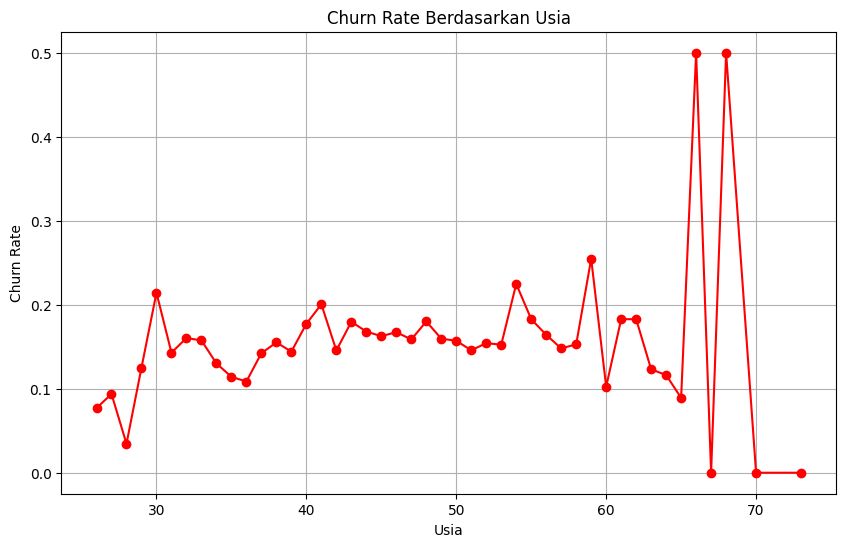

In [14]:
# Pastikan 'attrition_flag' sudah dalam format numerik
data['attrition_flag'] = data['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Hitung churn rate berdasarkan usia
churn_rate_by_age = data.groupby('customer_age')['attrition_flag'].mean()

# Visualisasi churn rate berdasarkan usia
plt.figure(figsize=(10, 6))
churn_rate_by_age.plot(kind='line', marker='o', color='red')
plt.title('Churn Rate Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()

Kelompok usia tertentu mungkin lebih rentan terhadap churn (seperti sekitar usia 30 dan di atas 60 tahun).
Lonjakan churn pada usia yang lebih tua dapat disebabkan oleh faktor-faktor tertentu, seperti perubahan kebutuhan atau ketidakmampuan untuk melanjutkan layanan.
Stabilitas churn pada usia 30-60 tahun menunjukkan bahwa pelanggan di usia ini cenderung lebih konsisten menggunakan layanan.

2. Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


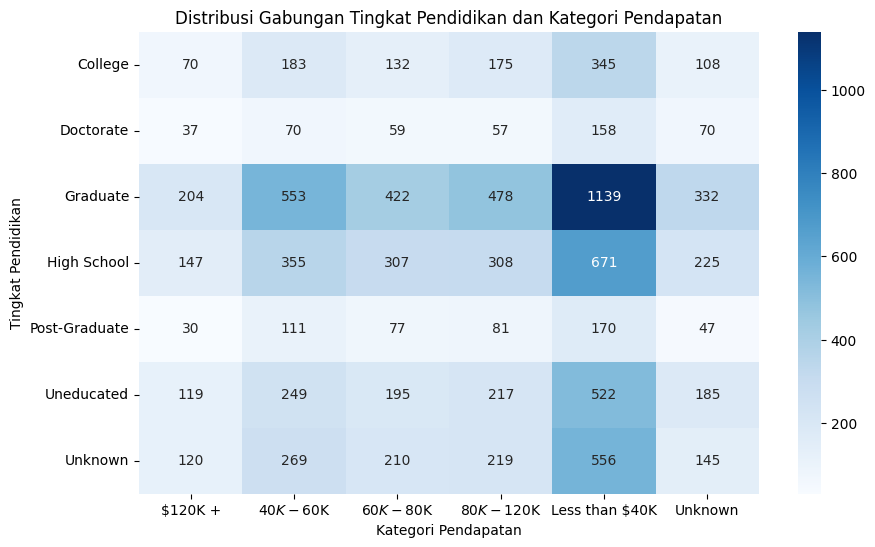

In [15]:
print(data['education_level'].unique())
print(data['income_category'].unique())

# Tabel silang untuk distribusi gabungan
education_income_ct = pd.crosstab(data['education_level'], data['income_category'])

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(education_income_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Distribusi Gabungan Tingkat Pendidikan dan Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Tingkat Pendidikan')
plt.show()

Sebagian besar pelanggan berasal dari kategori pendapatan Less than $40K, terutama dengan latar belakang pendidikan Graduate, High School, atau Uneducated.

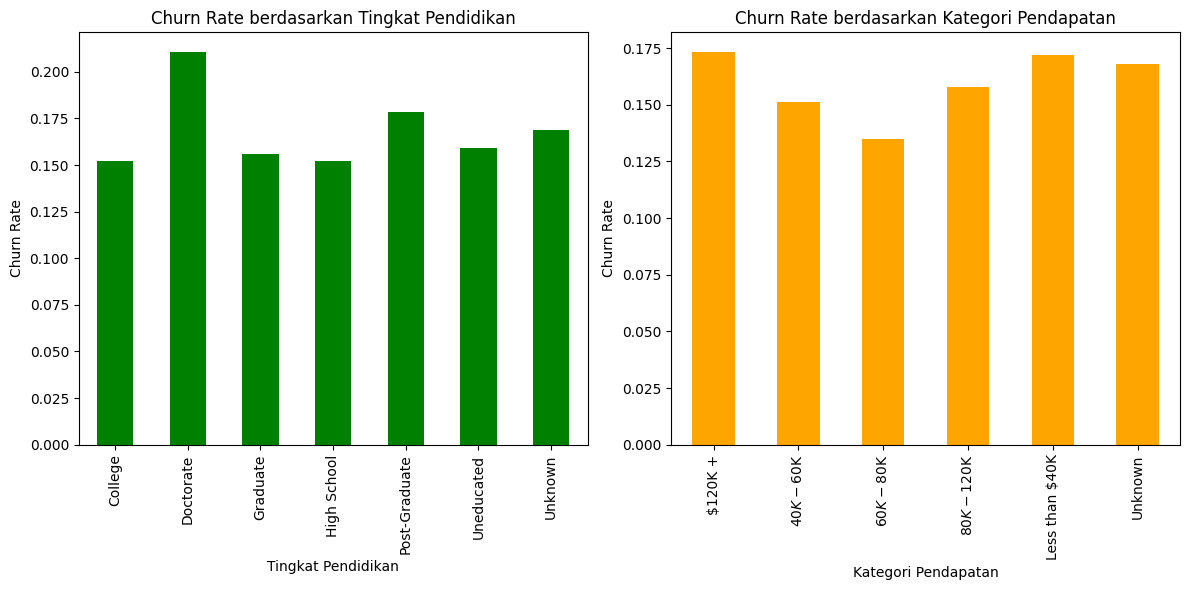

In [16]:
churn_by_education = data.groupby('education_level')['attrition_flag'].mean()

# Rata-rata churn berdasarkan kategori pendapatan
churn_by_income = data.groupby('income_category')['attrition_flag'].mean()

# Visualisasi churn rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
churn_by_education.plot(kind='bar', color='green')
plt.title('Churn Rate berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Churn Rate')

plt.subplot(1, 2, 2)
churn_by_income.plot(kind='bar', color='orange')
plt.title('Churn Rate berdasarkan Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

ingkat churn tertinggi:
Pelanggan dengan tingkat pendidikan Doctorate (lebih dari 20%). Pendidikan yang lebih tinggi (Doctorate) cenderung memiliki tingkat churn lebih tinggi.

Tingkat churn tertinggi:
Kategori pendapatan $120K+ dan Less than $40K memiliki churn rate tertinggi, sekitar 17.5%. Pelanggan dengan pendapatan sangat tinggi ($120K+) atau sangat rendah (Less than $40K) lebih rentan untuk churn. Pendapatan menengah cenderung lebih stabil.

Gabungan kedua grafik menunjukkan bahwa churn rate dipengaruhi oleh kombinasi pendidikan dan pendapatan, dengan pola yang konsisten pada kelompok tertentu.

3. Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

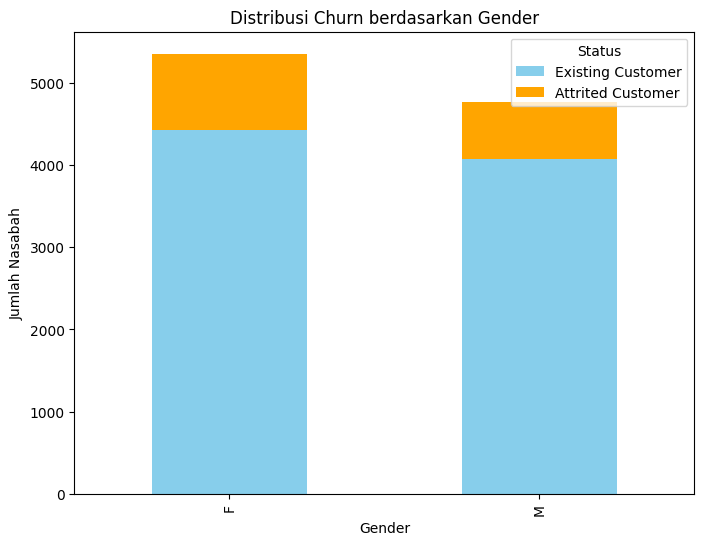

In [17]:
gender_churn_ct = pd.crosstab(data['gender'], data['attrition_flag'])

# Visualisasi
gender_churn_ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Distribusi Churn berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Nasabah')
plt.legend(['Existing Customer', 'Attrited Customer'], title='Status')
plt.show()

Wanita memiliki jumlah total nasabah yang lebih banyak dibandingkan pria, baik dalam kategori churn maupun existing customer. Namun, perusahaan perlu memperhatikan churn pada wanita, karena jumlah churn di kelompok ini tampak lebih tinggi secara total dibanding pria.

gender
F    0.173572
M    0.146152
Name: attrition_flag, dtype: float64


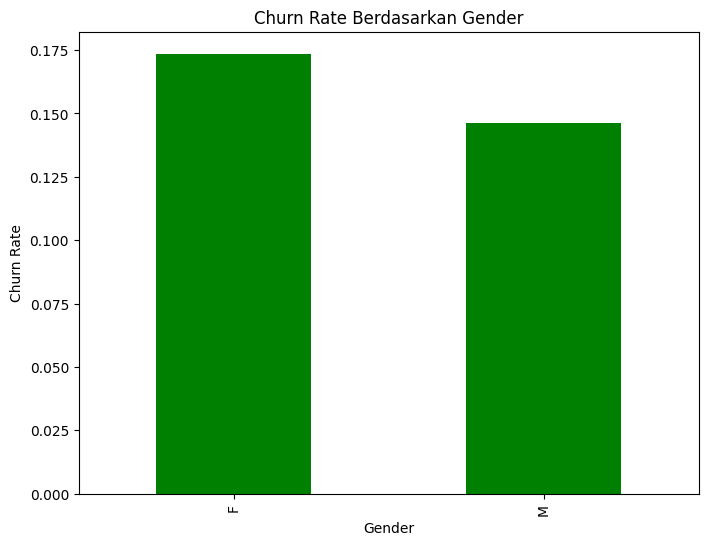

In [18]:
churn_rate_gender = data.groupby('gender')['attrition_flag'].mean()
print(churn_rate_gender)

# Visualisasi churn rate
churn_rate_gender.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Churn Rate Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

Perusahaan perlu memberikan perhatian khusus pada pelanggan wanita karena mereka memiliki tingkat churn yang lebih tinggi. Strategi retensi yang difokuskan pada kebutuhan dan preferensi pelanggan wanita dapat membantu mengurangi churn di kelompok ini.

4. Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

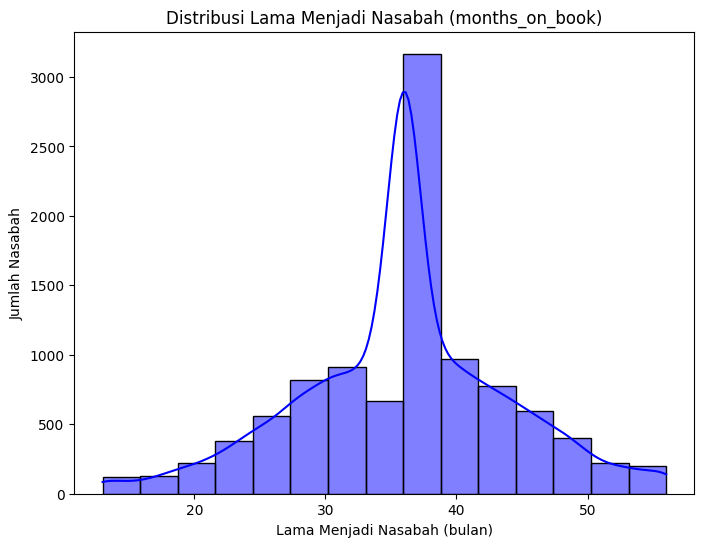

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data['months_on_book'], kde=True, color='blue', bins=15)
plt.title('Distribusi Lama Menjadi Nasabah (months_on_book)')
plt.xlabel('Lama Menjadi Nasabah (bulan)')
plt.ylabel('Jumlah Nasabah')
plt.show()

ebagian besar nasabah memiliki lama keanggotaan sekitar 36-38 bulan.
Distribusi data menunjukkan bahwa rata-rata lama menjadi nasabah berada di sekitar nilai tengah (sekitar 36-38 bulan), yang mencerminkan kestabilan pola keanggotaan.
Pola simetris ini menunjukkan bahwa tidak ada bias signifikan ke arah nasabah baru atau lama.

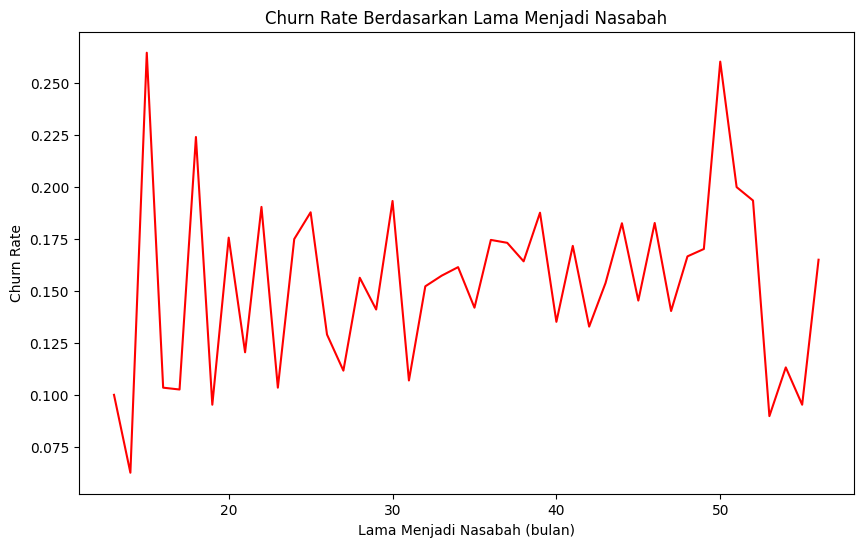

In [20]:
churn_rate_months = data.groupby('months_on_book')['attrition_flag'].mean()

# Visualisasi churn rate
plt.figure(figsize=(10, 6))
churn_rate_months.plot(kind='line', color='red')
plt.title('Churn Rate Berdasarkan Lama Menjadi Nasabah')
plt.xlabel('Lama Menjadi Nasabah (bulan)')
plt.ylabel('Churn Rate')
plt.show()

Pelanggan Baru Rentan Churn: Pelanggan pada masa awal (kurang dari 20 bulan) memiliki risiko churn yang lebih tinggi. Hal ini menunjukkan pentingnya strategi onboarding dan retensi di masa awal pelanggan menjadi nasabah.

Fokus pada Engagement Jangka Panjang: Lonjakan churn setelah 40 bulan menyoroti pentingnya menjaga hubungan yang baik dengan nasabah jangka panjang, seperti memberikan insentif atau program loyalitas.

Stabilisasi pada Tengah Periode: Perusahaan dapat memperkuat strategi pada periode stabil (20-40 bulan) untuk mempertahankan tingkat churn yang lebih rendah.

Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?


In [21]:
data['attrition_flag'] = data['attrition_flag'].replace(-1, 0)
data['attrition_flag'].value_counts()

attrition_flag
0    8500
1    1627
Name: count, dtype: int64

In [22]:
print(data['attrition_flag'].unique())

[0 1]


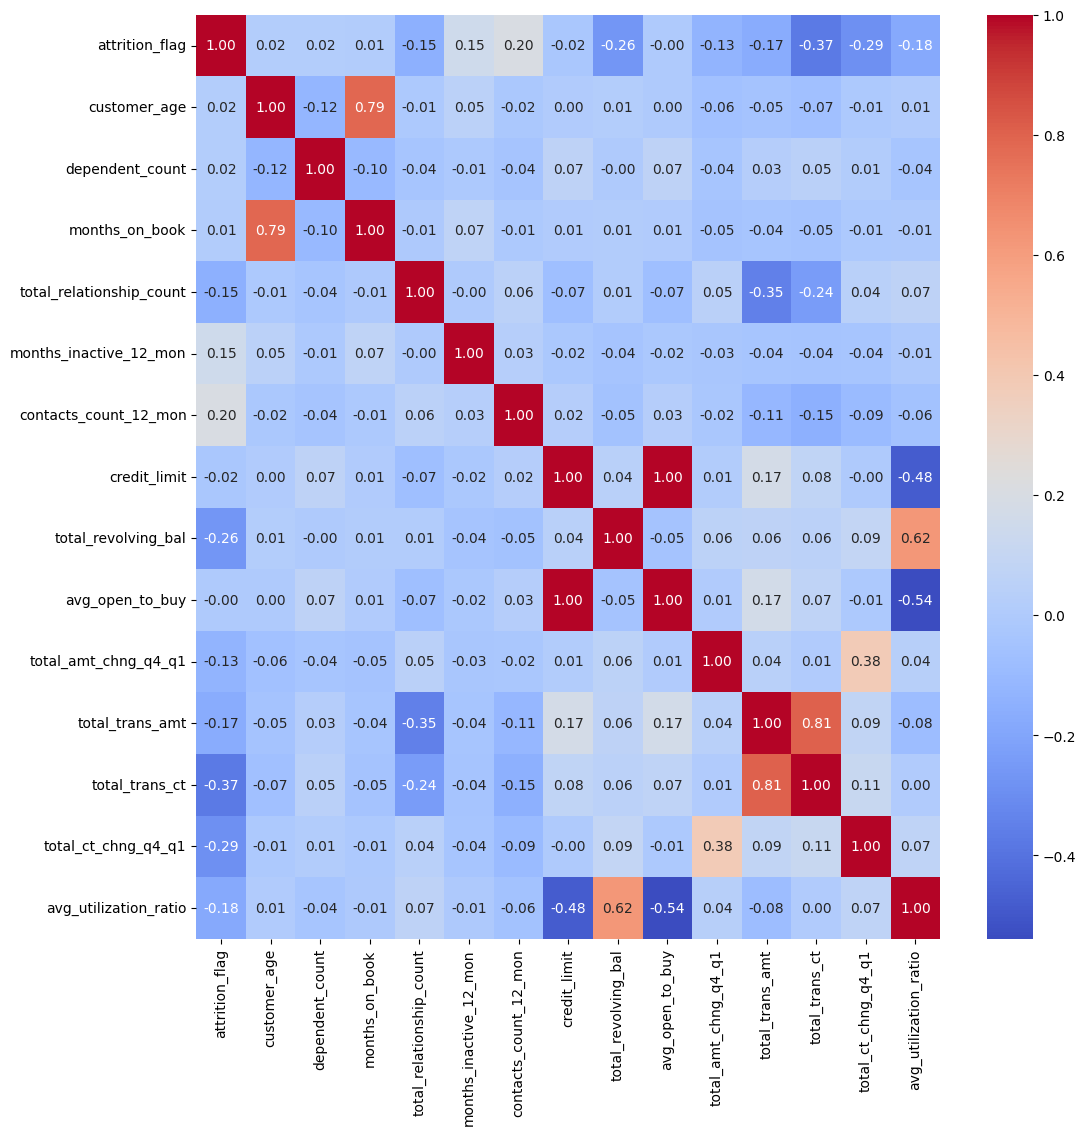

In [23]:
corr = data.select_dtypes(include=['int64', 'float64']).corr()

# plotting
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [24]:
X = data.select_dtypes(include=[np.number])

In [25]:
# use numeric columns
X = data.select_dtypes(include=[np.number])

# choose target
target = 'attrition_flag'

# count correlation feature with target
corr_with_target = X.corr()[target].sort_values(ascending=True)

print(corr_with_target)

total_trans_ct             -0.371403
total_ct_chng_q4_q1        -0.290054
total_revolving_bal        -0.263053
avg_utilization_ratio      -0.178410
total_trans_amt            -0.168598
total_relationship_count   -0.150005
total_amt_chng_q4_q1       -0.131063
credit_limit               -0.023873
avg_open_to_buy            -0.000285
months_on_book              0.013687
customer_age                0.018203
dependent_count             0.018991
months_inactive_12_mon      0.152449
contacts_count_12_mon       0.204491
attrition_flag              1.000000
Name: attrition_flag, dtype: float64


In [26]:
nums = data.select_dtypes(include=['int64', 'float64'])  # Change 'df' to 'data'
nums.columns

Index(['attrition_flag', 'customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# select numeric columns
X = data.select_dtypes(include=[np.number])

# calculate vif score
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['vif_score'] = [vif(X.values, i) for i in range(X.shape[1])]

vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature  vif_score
0             attrition_flag   1.678337
1               customer_age  76.787515
2            dependent_count   4.141598
3             months_on_book  56.447499
4   total_relationship_count   7.577623
5     months_inactive_12_mon   6.376731
6      contacts_count_12_mon   5.915197
7               credit_limit        inf
8        total_revolving_bal        inf
9            avg_open_to_buy        inf
10      total_amt_chng_q4_q1  14.001605
11           total_trans_amt   8.901630
12            total_trans_ct  25.766681
13       total_ct_chng_q4_q1  12.131686
14     avg_utilization_ratio   5.763442

In [28]:
data = data.drop(columns=['credit_limit', 'total_revolving_bal', 'avg_open_to_buy'])

In [29]:
# Pastikan attrition_flag adalah integer
data['attrition_flag'] = data['attrition_flag'].astype(int) # Changed 'df' to 'data'

# Ubah mapping nilai 'attrition_flag' ke label baru yang lebih reliable
data['attrition_flag'] = data['attrition_flag'].map({0: 'Existing Customer', 1: 'Attrited Customer'}) # Changed 'df' to 'data'

# Tampilkan beberapa baris pertama dari kolom 'attrition_flag' untuk verifikasi
data[['attrition_flag']].head() # Changed 'df' to 'data'

attrition_flag
0  Existing Customer
1  Existing Customer
2  Existing Customer
3  Existing Customer
4  Existing Customer

In [30]:
# select categorical columns
cats = data.select_dtypes(include=[np.number])
cats.columns

Index(['customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [31]:
#Chi-square test of independence

from scipy.stats import chi2_contingency

independent_cols = []

# Assuming 'attrition_flag' is your target variable
target_variable = 'attrition_flag'

for col in cats.columns:
    # Use the target variable instead of 'label'
    # Changed 'df' to 'data' to refer to the correct DataFrame
    observed_frequency = pd.crosstab(cats[col], data[target_variable])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue < 0.1:
        print(f"{col} is dependent , its pvalue is {chi.pvalue}")
    else:
        print(f"{col} is independent , its pvalue is {chi.pvalue}")
        independent_cols.append(col)
    print()

print(independent_cols)

customer_age is dependent , its pvalue is 0.02082917739428747

dependent_count is dependent , its pvalue is 0.09150463456682643

months_on_book is dependent , its pvalue is 0.05742908739736116

total_relationship_count is dependent , its pvalue is 2.6610499913717976e-59

months_inactive_12_mon is dependent , its pvalue is 1.6155198022594863e-82

contacts_count_12_mon is dependent , its pvalue is 1.7769862229780962e-123

total_amt_chng_q4_q1 is dependent , its pvalue is 9.898367509142932e-24

total_trans_amt is dependent , its pvalue is 4.501517465448383e-62

total_trans_ct is dependent , its pvalue is 0.0

total_ct_chng_q4_q1 is dependent , its pvalue is 2.0263725971846606e-225

avg_utilization_ratio is dependent , its pvalue is 1.0391207386104066e-54

[]


In [32]:
# lable encoder
# identify object columns
cats = data.select_dtypes(include=[np.number]).columns

# convert to numeric
data[cats] = data[cats].apply(lambda col: col.astype('category').cat.codes)
data.head()

attrition_flag  customer_age gender  dependent_count education_level  \
0  Existing Customer            19      M                3     High School   
1  Existing Customer            23      F                5        Graduate   
2  Existing Customer            25      M                3        Graduate   
3  Existing Customer            14      F                4     High School   
4  Existing Customer            14      M                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              26   
1         Single  Less than $40K          Blue              31   
2        Married    $80K - $120K          Blue              23   
3        Unknown  Less than $40K          Blue              21   
4        Married     $60K - $80K          Blue               8   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         4                       1                      3   
1                         5                       1                      2   
2                         3                       1                      0   
3                         2                       4                      1   
4                         4                       1                      0   

   total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
0                   987              217              32                  791   
1                  1073              338              23                  829   
2                  1154              893              10                  818   
3                  1020              236              10                  818   
4                  1145               65              18                  821   

   avg_utilization_ratio  
0                     58  
1                    102  
2                      0  
3                    757  
4                      0

In [33]:
features = ['total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'total_amt_chng_q4_q1',
            'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

In [34]:
# split data to feature and target
X = data[features]
y = data['attrition_flag']

# split train and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# split the temporary set into a validation set (20%) and a test set (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [36]:
!pip install scikit-learn==1.3.0 --upgrade

  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [37]:
from imblearn.over_sampling import SMOTE # Import SMOTE class from imblearn.over_sampling
# using SMOTE for imbalance target class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b9b7e1203a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


Class distribution before SMOTE:
attrition_flag
Existing Customer    5100
Attrited Customer     976
Name: count, dtype: int64

Class distribution after SMOTE:
attrition_flag
Existing Customer    5100
Attrited Customer    5100
Name: count, dtype: int64


sebelum SMOTE:
Distribusi Awal:

Existing Customer (Kelas 0): 5100 nasabah.
Attrited Customer (Kelas 1): 976 nasabah.
Kelas Imbang: Tidak, karena kelas mayoritas jauh lebih besar dari kelas minoritas.

Distribusi Setelah Oversampling:

Existing Customer (Kelas 0): 5100 nasabah.
Attrited Customer (Kelas 1): 5100 nasabah.
Kelas Imbang: Ya, SMOTE telah membuat distribusi kelas menjadi seimbang

In [38]:
!pip install scikit-learn==1.0.2

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.0.2 which is incompatible.
^C


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Definisikan model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
y_train_smote = y_train_smote.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)

# Now, run the cross-validation:
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# finding best model based on average accuracy
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\nBest Model: {best_model_name}")

Logistic Regression Cross-Validation Accuracy: 0.8655 (+/- 0.0171)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.9746 (+/- 0.0128)
Decision Tree Cross-Validation Accuracy: 0.9528 (+/- 0.0151)
Naive Bayes Cross-Validation Accuracy: 0.8165 (+/- 0.0183)
SVM Cross-Validation Accuracy: 0.8615 (+/- 0.0055)
Random Forest Cross-Validation Accuracy: 0.9716 (+/- 0.0150)

Best Model: XGBoost


# Modelling

In [43]:
from sklearn.metrics import classification_report
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)  # Fit model

# Predict on validation data and test data
y_val_pred_logreg = logreg.predict(X_val)
y_test_pred_logreg = logreg.predict(X_test)

# Convert predictions back to original labels if needed
y_val_pred_logreg = pd.Series(y_val_pred_logreg).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_logreg = pd.Series(y_test_pred_logreg).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values

# Display classification report for validation data
print("\nLogistic Regression - Validation Data:")
print(classification_report(y_val, y_val_pred_logreg))

# Display classification report for test data
print("\nLogistic Regression - Test Data:")
print(classification_report(y_test, y_test_pred_logreg))


Logistic Regression - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.53      0.82      0.65       325
Existing Customer       0.96      0.86      0.91      1700

         accuracy                           0.86      2025
        macro avg       0.75      0.84      0.78      2025
     weighted avg       0.89      0.86      0.87      2025


Logistic Regression - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.51      0.81      0.63       326
Existing Customer       0.96      0.85      0.90      1700

         accuracy                           0.85      2026
        macro avg       0.74      0.83      0.77      2026
     weighted avg       0.89      0.85      0.86      2026



In [44]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_xgb = xgb_clf.predict(X_val)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Convert predictions back to original labels
y_val_pred_xgb = pd.Series(y_val_pred_xgb).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_xgb = pd.Series(y_test_pred_xgb).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values

# Classification report
print("XGBoost - Validation Data:")
print(classification_report(y_val, y_val_pred_xgb))

print("\nXGBoost - Test Data:")
print(classification_report(y_test, y_test_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.86      0.88      0.87       325
Existing Customer       0.98      0.97      0.97      1700

         accuracy                           0.96      2025
        macro avg       0.92      0.92      0.92      2025
     weighted avg       0.96      0.96      0.96      2025


XGBoost - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.83      0.92      0.87       326
Existing Customer       0.98      0.96      0.97      1700

         accuracy                           0.96      2026
        macro avg       0.91      0.94      0.92      2026
     weighted avg       0.96      0.96      0.96      2026



In [46]:
# Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_dtc = dtc.predict(X_val)
y_test_pred_dtc = dtc.predict(X_test)

# Convert predictions back to original labels
y_val_pred_dtc = pd.Series(y_val_pred_dtc).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_dtc = pd.Series(y_test_pred_dtc).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values


# Classification report
print("Decision Tree - Validation Data:")
print(classification_report(y_val, y_val_pred_dtc))

print("\nDecision Tree - Test Data:")
print(classification_report(y_test, y_test_pred_dtc))

Decision Tree - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.79      0.77       325
Existing Customer       0.96      0.95      0.96      1700

         accuracy                           0.93      2025
        macro avg       0.86      0.87      0.87      2025
     weighted avg       0.93      0.93      0.93      2025


Decision Tree - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.73      0.81      0.77       326
Existing Customer       0.96      0.94      0.95      1700

         accuracy                           0.92      2026
        macro avg       0.85      0.88      0.86      2026
     weighted avg       0.93      0.92      0.92      2026



In [47]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_nb = nb.predict(X_val)
y_test_pred_nb = nb.predict(X_test)

# Convert predictions back to original labels
y_val_pred_nb = pd.Series(y_val_pred_nb).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_nb = pd.Series(y_test_pred_nb).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values

# Classification report
print("Naive Bayes - Validation Data:")
print(classification_report(y_val, y_val_pred_nb))

print("\nNaive Bayes - Test Data:")
print(classification_report(y_test, y_test_pred_nb))

Naive Bayes - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.44      0.71      0.54       325
Existing Customer       0.94      0.83      0.88      1700

         accuracy                           0.81      2025
        macro avg       0.69      0.77      0.71      2025
     weighted avg       0.86      0.81      0.83      2025


Naive Bayes - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.44      0.75      0.55       326
Existing Customer       0.94      0.82      0.87      1700

         accuracy                           0.80      2026
        macro avg       0.69      0.78      0.71      2026
     weighted avg       0.86      0.80      0.82      2026



In [48]:
# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_svm = svm.predict(X_val)
y_test_pred_svm = svm.predict(X_test)

# Convert predictions back to original labels
y_val_pred_svm = pd.Series(y_val_pred_svm).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_svm = pd.Series(y_test_pred_svm).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values

# Classification report
print("SVM - Validation Data:")
print(classification_report(y_val, y_val_pred_svm))

print("\nSVM - Test Data:")
print(classification_report(y_test, y_test_pred_svm))

SVM - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.48      0.88      0.62       325
Existing Customer       0.97      0.82      0.89      1700

         accuracy                           0.83      2025
        macro avg       0.73      0.85      0.76      2025
     weighted avg       0.89      0.83      0.85      2025


SVM - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.46      0.89      0.60       326
Existing Customer       0.97      0.80      0.88      1700

         accuracy                           0.81      2026
        macro avg       0.72      0.84      0.74      2026
     weighted avg       0.89      0.81      0.83      2026



In [49]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_rf = rf_clf.predict(X_val)
y_test_pred_rf = rf_clf.predict(X_test)

# Convert predictions back to original labels
y_val_pred_rf = pd.Series(y_val_pred_rf).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values
y_test_pred_rf = pd.Series(y_test_pred_rf).map({0: 'Existing Customer', 1: 'Attrited Customer'}).values

# Classification report
print("Random Forest - Validation Data:")
print(classification_report(y_val, y_val_pred_rf))

print("\nRandom Forest - Test Data:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       0.82      0.88      0.85       325
Existing Customer       0.98      0.96      0.97      1700

         accuracy                           0.95      2025
        macro avg       0.90      0.92      0.91      2025
     weighted avg       0.95      0.95      0.95      2025


Random Forest - Test Data:
                   precision    recall  f1-score   support

Attrited Customer       0.84      0.90      0.87       326
Existing Customer       0.98      0.97      0.97      1700

         accuracy                           0.96      2026
        macro avg       0.91      0.93      0.92      2026
     weighted avg       0.96      0.96      0.96      2026



In [50]:
logreg_report = classification_report(y_test, y_test_pred_logreg, output_dict=True)
xgb_report = classification_report(y_test, y_test_pred_xgb, output_dict=True)
dt_report = classification_report(y_test, y_test_pred_dtc, output_dict=True)
nb_report = classification_report(y_test, y_test_pred_nb, output_dict=True)
svm_report = classification_report(y_test, y_test_pred_svm, output_dict=True)
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)

In [52]:
from sklearn.metrics import accuracy_score

# Menghitung accuracy untuk setiap model
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
accuracy_dt = accuracy_score(y_test, y_test_pred_dtc)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Menambahkan accuracy ke dalam dictionary metrics
# Changed keys from '0' and '1' to 'Existing Customer' and 'Attrited Customer' respectively
metrics = {
    "Model": ["Logistic Regression", "XGBoost", "Decision Trees", "Naive Bayes", "SVM", "Random Forest"],
    "Precision (Existing Customer)": [
        logreg_report['Existing Customer']['precision'],
        xgb_report['Existing Customer']['precision'],
        dt_report['Existing Customer']['precision'],
        nb_report['Existing Customer']['precision'],
        svm_report['Existing Customer']['precision'],
        rf_report['Existing Customer']['precision']
    ],
    "Recall (Existing Customer)": [
        logreg_report['Existing Customer']['recall'],
        xgb_report['Existing Customer']['recall'],
        dt_report['Existing Customer']['recall'],
        nb_report['Existing Customer']['recall'],
        svm_report['Existing Customer']['recall'],
        rf_report['Existing Customer']['recall']
    ],
    "F1-Score (Existing Customer)": [
        logreg_report['Existing Customer']['f1-score'],
        xgb_report['Existing Customer']['f1-score'],
        dt_report['Existing Customer']['f1-score'],
        nb_report['Existing Customer']['f1-score'],
        svm_report['Existing Customer']['f1-score'],
        rf_report['Existing Customer']['f1-score']
    ],
    "Precision (Attrited Customer)": [
        logreg_report['Attrited Customer']['precision'],
        xgb_report['Attrited Customer']['precision'],
        dt_report['Attrited Customer']['precision'],
        nb_report['Attrited Customer']['precision'],
        svm_report['Attrited Customer']['precision'],
        rf_report['Attrited Customer']['precision']
    ],
    "Recall (Attrited Customer)": [
        logreg_report['Attrited Customer']['recall'],
        xgb_report['Attrited Customer']['recall'],
        dt_report['Attrited Customer']['recall'],
        nb_report['Attrited Customer']['recall'],
        svm_report['Attrited Customer']['recall'],
        rf_report['Attrited Customer']['recall']
    ],
    "F1-Score (Attrited Customer)": [
        logreg_report['Attrited Customer']['f1-score'],
        xgb_report['Attrited Customer']['f1-score'],
        dt_report['Attrited Customer']['f1-score'],
        nb_report['Attrited Customer']['f1-score'],
        svm_report['Attrited Customer']['f1-score'],
        rf_report['Attrited Customer']['f1-score']
    ],
    "Accuracy": [
        accuracy_logreg,
        accuracy_xgb,
        accuracy_dt,
        accuracy_nb,
        accuracy_svm,
        accuracy_rf
    ]
}

# Membuat DataFrame
results = pd.DataFrame(metrics)

# Menampilkan hasil
results

Model  Precision (Existing Customer)  \
0  Logistic Regression                       0.958388   
1              XGBoost                       0.984394   
2       Decision Trees                       0.963297   
3          Naive Bayes                       0.943499   
4                  SVM                       0.973496   
5        Random Forest                       0.980310   

   Recall (Existing Customer)  F1-Score (Existing Customer)  \
0                    0.853529                      0.902925   
1                    0.964706                      0.974450   
2                    0.941765                      0.952409   
3                    0.815294                      0.874724   
4                    0.799412                      0.877907   
5                    0.966471                      0.973341   

   Precision (Attrited Customer)  Recall (Attrited Customer)  \
0                       0.513672                    0.806748   
1                       0.833333                    0.920245   
2                       0.728022                    0.812883   
3                       0.436266                    0.745399   
4                       0.458730                    0.886503   
5                       0.837143                    0.898773   

   F1-Score (Attrited Customer)  Accuracy  
0                      0.627685  0.846002  
1                      0.874636  0.957552  
2                      0.768116  0.921027  
3                      0.550396  0.804047  
4                      0.604603  0.813425  
5                      0.866864  0.955577

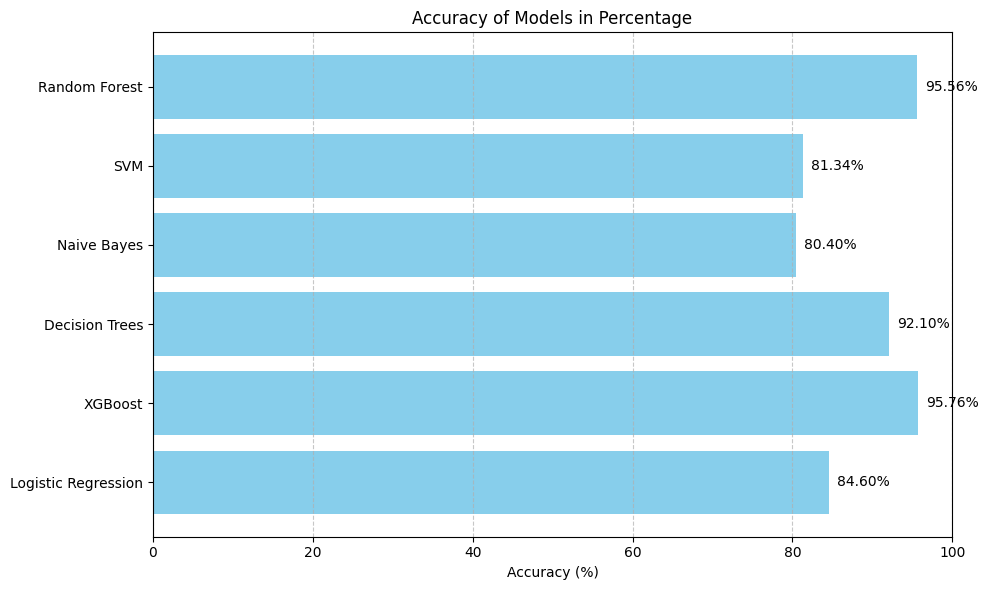

In [53]:
# Convert accuracy to percentage
results["Accuracy (%)"] = results["Accuracy"] * 100

# Plotting the barplot
plt.figure(figsize=(10, 6))
bars = plt.barh(results["Model"], results["Accuracy (%)"], color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of Models in Percentage")
plt.xlim(0, 100)  # Set limit to represent percentage scale
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add percentage values at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()



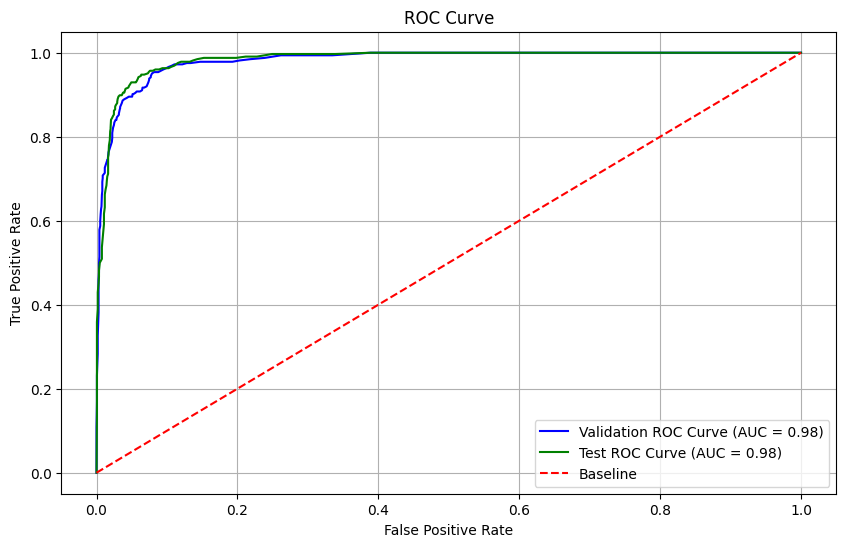

In [55]:
from sklearn.metrics import roc_curve, auc

# ... (rest of your code) ...

# Convert y_val and y_test to numeric (0 and 1)
y_val_numeric = y_val.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)
y_test_numeric = y_test.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)

# Probabilitas prediksi
y_val_prob_rf = rf_clf.predict_proba(X_val)[:, 1]  # Mengambil probabilitas kelas positif
y_test_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# ROC Curve for validation set
# Use y_val_numeric instead of y_val
fpr_val, tpr_val, _ = roc_curve(y_val_numeric, y_val_prob_rf)
roc_auc_val = auc(fpr_val, tpr_val)

# ROC Curve fot test set
# Use y_test_numeric instead of y_test
fpr_test, tpr_test, _ = roc_curve(y_test_numeric, y_test_prob_rf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, color='blue', label=f'Validation ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


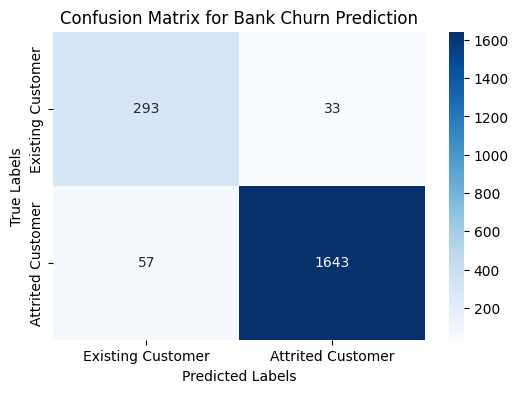

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred_rf are already defined
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Define class labels for better readability
class_names = ['Existing Customer', 'Attrited Customer']

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Bank Churn Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

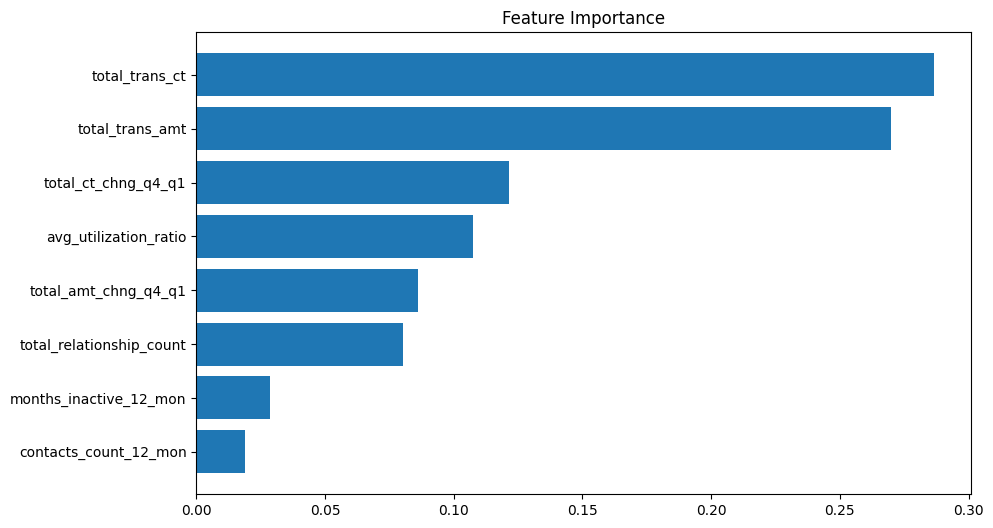

In [57]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.title("Feature Importance")
plt.show()

In [58]:
# initiate explainer for XGBoost model
xgb_expl = dx.Explainer(xgb_clf, X_train, y_train, label="XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 6076 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6076 values
  -> target variable   : Please note that 'y' is a string array.
  -> target variable   : 'y' should be a numeric or boolean array.
  -> target variable   : Otherwise an Error may occur in calculating residuals or loss.
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b9b98eb3400> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.39e-07, mean = 0.166, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual_function' returns an Error when executed:
unsupported opera

In [61]:
# ... (your existing code) ...

# initiate explainer for XGBoost model
# Ensure y_train is numeric before passing to Explainer
y_train_numeric = y_train.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)
xgb_expl = dx.Explainer(xgb_clf, X_train, y_train_numeric, label="XGBoost Interpretation")

# ... (rest of your code) ...

xgb_expl.model_parts().plot()  # Use xgb_expl for XGBoost model visualization

Preparation of a new explainer is initiated

  -> data              : 6076 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6076 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b9b98eb3400> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.39e-07, mean = 0.166, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.939, mean = -0.00585, max = 0.342
  -> model_info        : package xgboost

A new explainer has been created!


In [67]:
xgb_expl.model_profile().plot() # Use xgb_expl instead of churn_xgb_exp

Calculating ceteris paribus:   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  12%|█▎        | 1/8 [00:00<00:01,  3.62it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.06 0.12 ... 5.88 5.94 6.  ]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  25%|██▌       | 2/8 [00:00<00:01,  3.31it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: Future

In [71]:
# Misal X_train dan y_train adalah data training
# Melatih model XGBoost
xgb_clf = xgb.XGBClassifier()
# Convert y_train to numerical values
y_train_numeric = y_train.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)
xgb_clf.fit(X_train, y_train_numeric)  # Use y_train_numeric for fitting

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

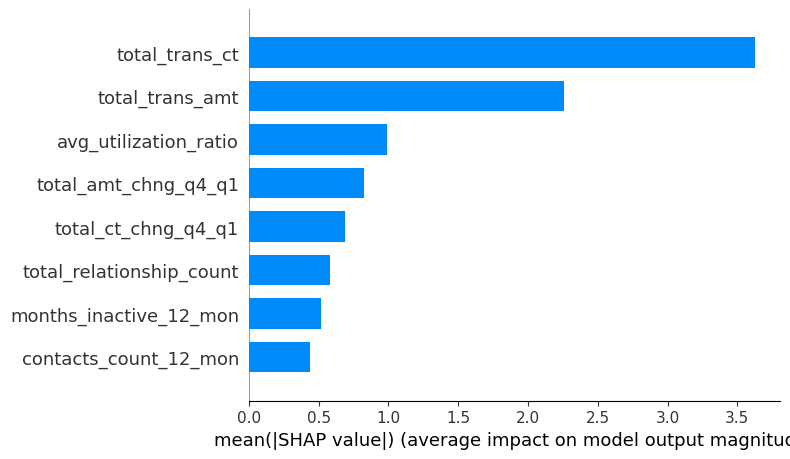

In [72]:
# create SHAP Tree Explainer for XGBoost model with| first 1000 rows of train data
xgb_shap_values = shap.TreeExplainer(xgb_clf).shap_values(X_train[:1000])

# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(xgb_shap_values, X_train[1000:2000], plot_type='bar')

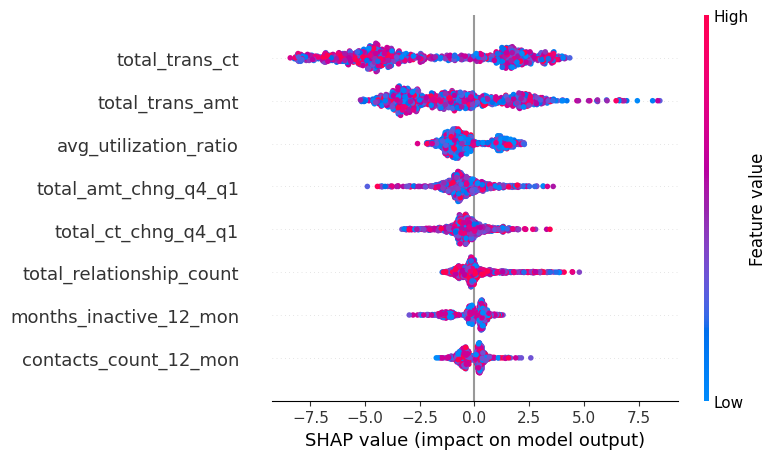

In [73]:
# create SHAP summary plot to visualize impact distribution of next 1000 rows of train data
shap.summary_plot(xgb_shap_values, X_train[1000:2000])

In [74]:
# initiate javascript module
shap.initjs()

In [75]:
# check data for row 1
X_train.iloc[1,:]

total_relationship_count      2
months_inactive_12_mon        2
contacts_count_12_mon         3
total_amt_chng_q4_q1        939
total_trans_amt             580
total_trans_ct               31
total_ct_chng_q4_q1         642
avg_utilization_ratio        48
Name: 70, dtype: int16

In [77]:
# check target for row 1
y_train.iloc[1]  # Use iloc to access by position instead of label

'Existing Customer'

In [79]:
# Assuming you want to access predictions for X_train
xgb_pred = xgb_clf.predict(X_train)  # Get predictions for X_train

# If you need it as a pandas Series or DataFrame for easier indexing:
xgb_pred = pd.Series(xgb_pred, index=X_train.index)  # Add index for

In [80]:
# create SHAP Tree Explainer for XGBoost model with all rows of train data
xgb_explainer = shap.TreeExplainer(xgb_clf)
# create shap values from xgb_explainer
xgb_shap_values = xgb_explainer.shap_values(X_train)

In [81]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[1,:], X_train.iloc[1,:])

In [82]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[:1000,:], X_train.iloc[:1000,:])

In [83]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Define XGBoost explainer with lime module
xgb_lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Existing Customer', 'Attrited Customer'],  # Original class names from your data
    discretize_continuous=True,
    verbose=True,
    mode='classification'  # Specify classification mode explicitly
)

# Get explanation for the first row in your test data
explanation = xgb_lime_explainer.explain_instance(
    X_test.iloc[0].values,
    xgb_clf.predict_proba,  # Use your XGBoost model's prediction probability function
    num_features=5  # Number of features to include in the explanation
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

Intercept 0.16192320452697284
Prediction_local [0.35716464]
Right: 8.728748e-05
